# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

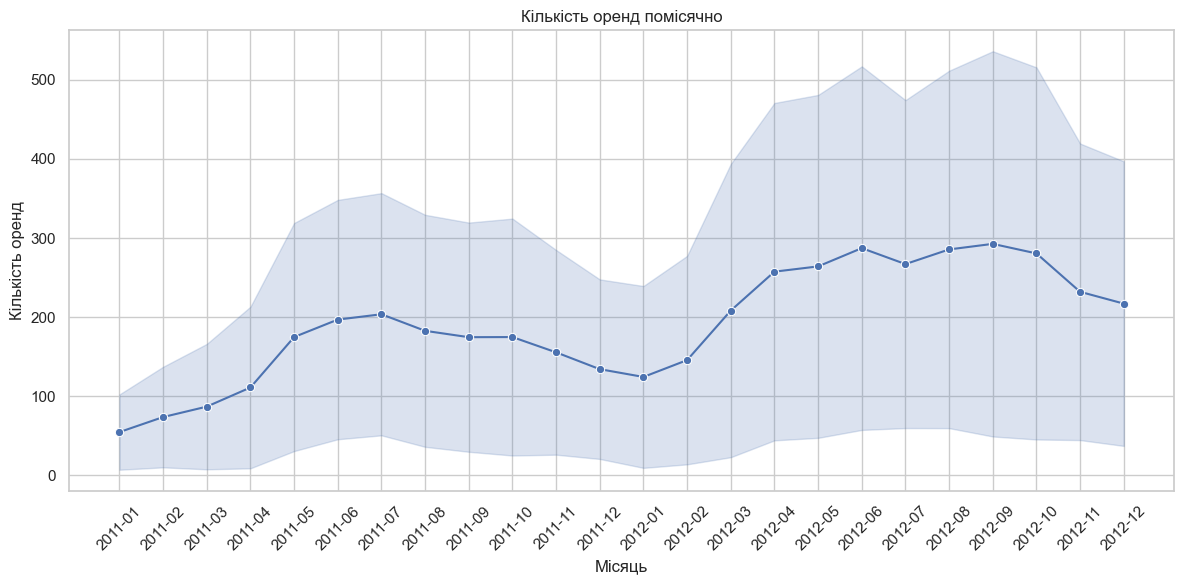

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o')
plt.title('Кількість оренд помісячно')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.tight_layout();

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

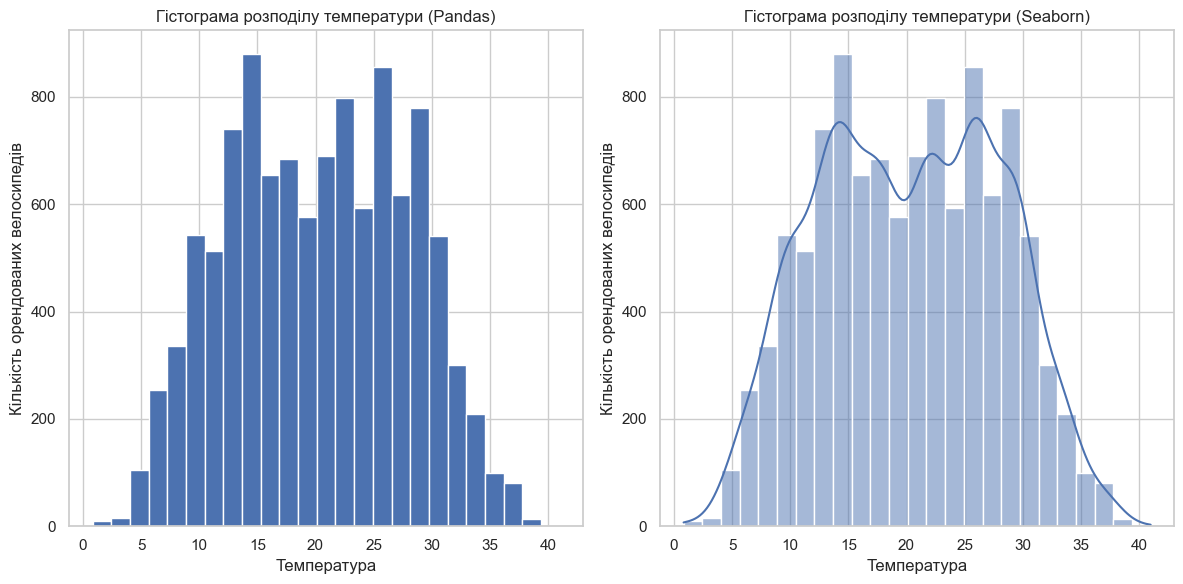

In [58]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
df['temp'].plot.hist(bins=25,
                     title='Гістограма розподілу температури (Pandas)',
                     xlabel='Температура',
                     ylabel='Кількість орендованих велосипедів'
                    )

plt.subplot(1,2,2)
sns.histplot(df['temp'], bins=25, kde=True)
plt.title('Гістограма розподілу температури (Seaborn)')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованих велосипедів')

plt.tight_layout()
plt.show()

1. Гістограма, побудована з Seaborn має більш стилізований дизайн та м'яку палітру кольорів.
2. Додаткова лінія на графіку Seaborn показує приблизний розподіл даних, це та сама гістрогамма, але ніби-то згладжена.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

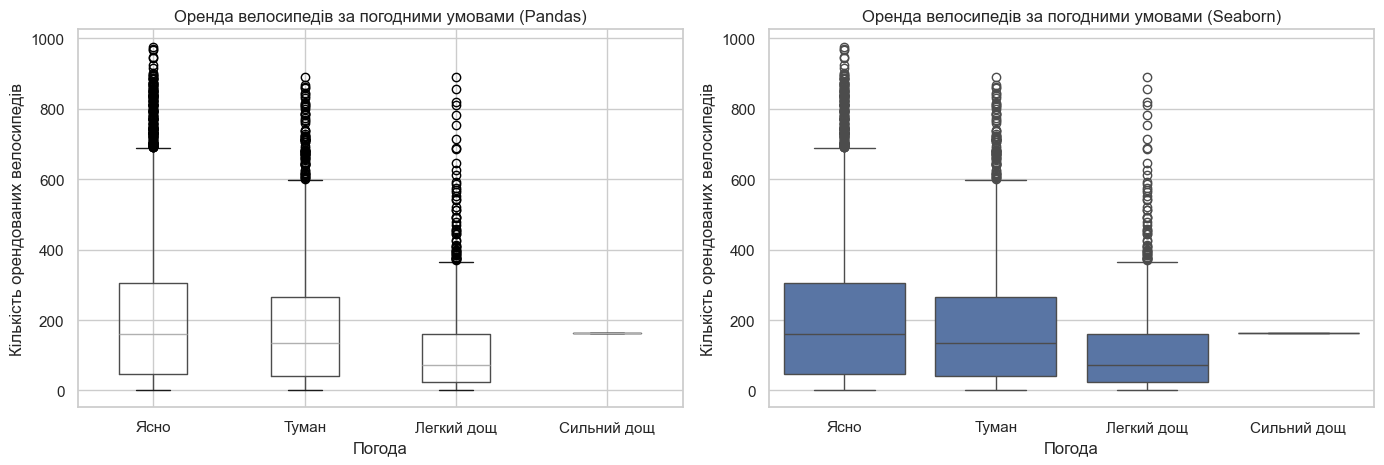

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

df.boxplot(column='count', by='weather', ax=ax[0])
ax[0].set_title("Оренда велосипедів за погодними умовами (Pandas)")
ax[0].set_xlabel("Погода")
ax[0].set_ylabel("Кількість орендованих велосипедів")
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
fig.suptitle("")


sns.boxplot(df, x='weather', y='count', ax=ax[1])
ax[1].set_title("Оренда велосипедів за погодними умовами (Seaborn)")
ax[1].set_xlabel("Погода")
ax[1].set_ylabel("Кількість орендованих велосипедів")
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])

plt.tight_layout()
plt.show()

Візуальна різниця між Pandas та Seaborn бокс-плотами полягає у більш естетичному вигляді графіку Seaborn, а таж в тому, що є заливка боксів за замовченням.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [72]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

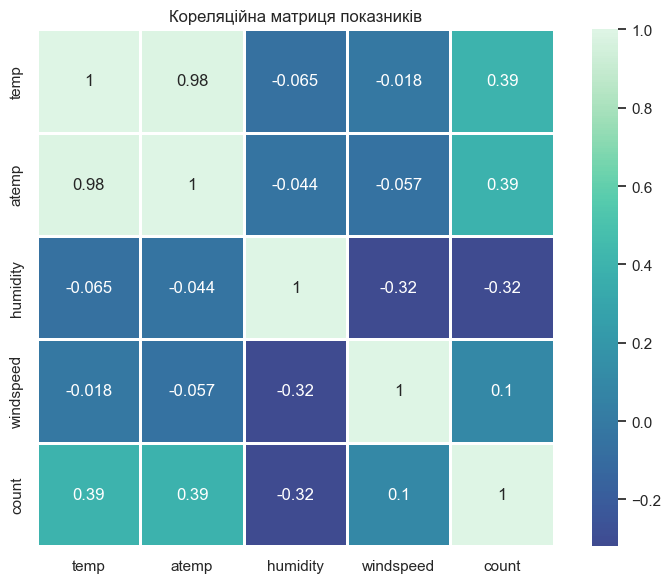

In [73]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='mako', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

1. Із загальною кількістю оренди найсильніше корелюють температурні показники.
2. Кореляція між temp та atemp складає 0,98, що обумовлено тим, що погода майже завжди відчувіється лише на 1-2 градуси відмінно від самих показників.
3. Негативну кореляцію мають змінні humidity та windspeed.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


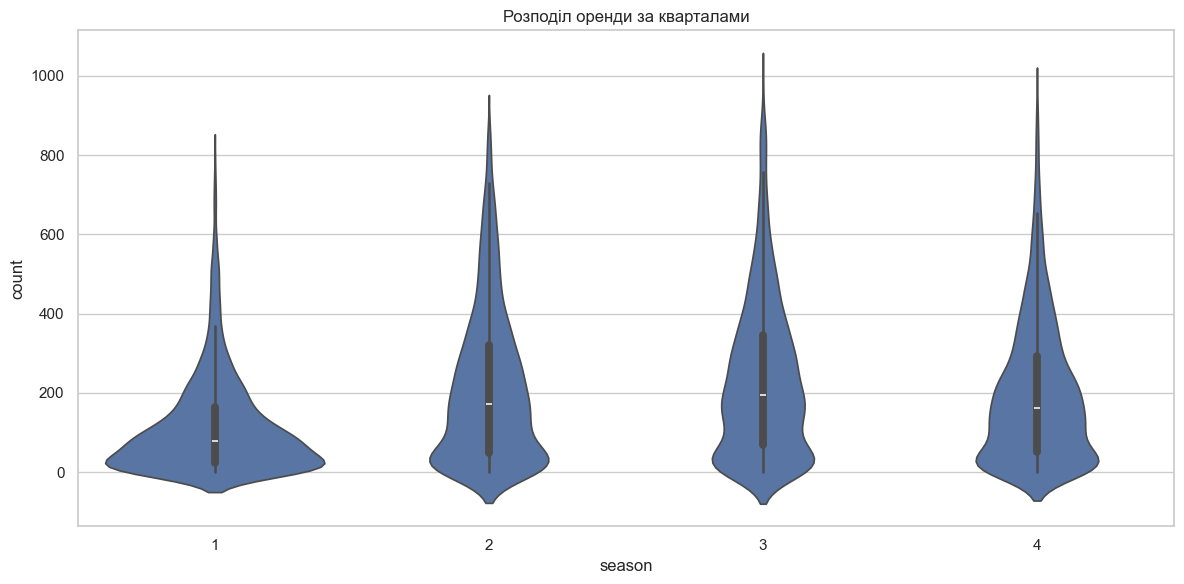

In [85]:
plt.figure(figsize=(12, 6))
sns.violinplot(df, x='season', y='count')
plt.title('Розподіл оренди за кварталами')
plt.tight_layout()
plt.show()

1. "товщина" violin plot показує щільність даних, тобто, чим ширша "синя зона", тим більше точок в ній знаходиться. 
2. В 3му кварталі найбільша варіабельність оренди.
3. Перевага violin plot над звичайним box plot в тому, що він дає оцінку щільності розподілу.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

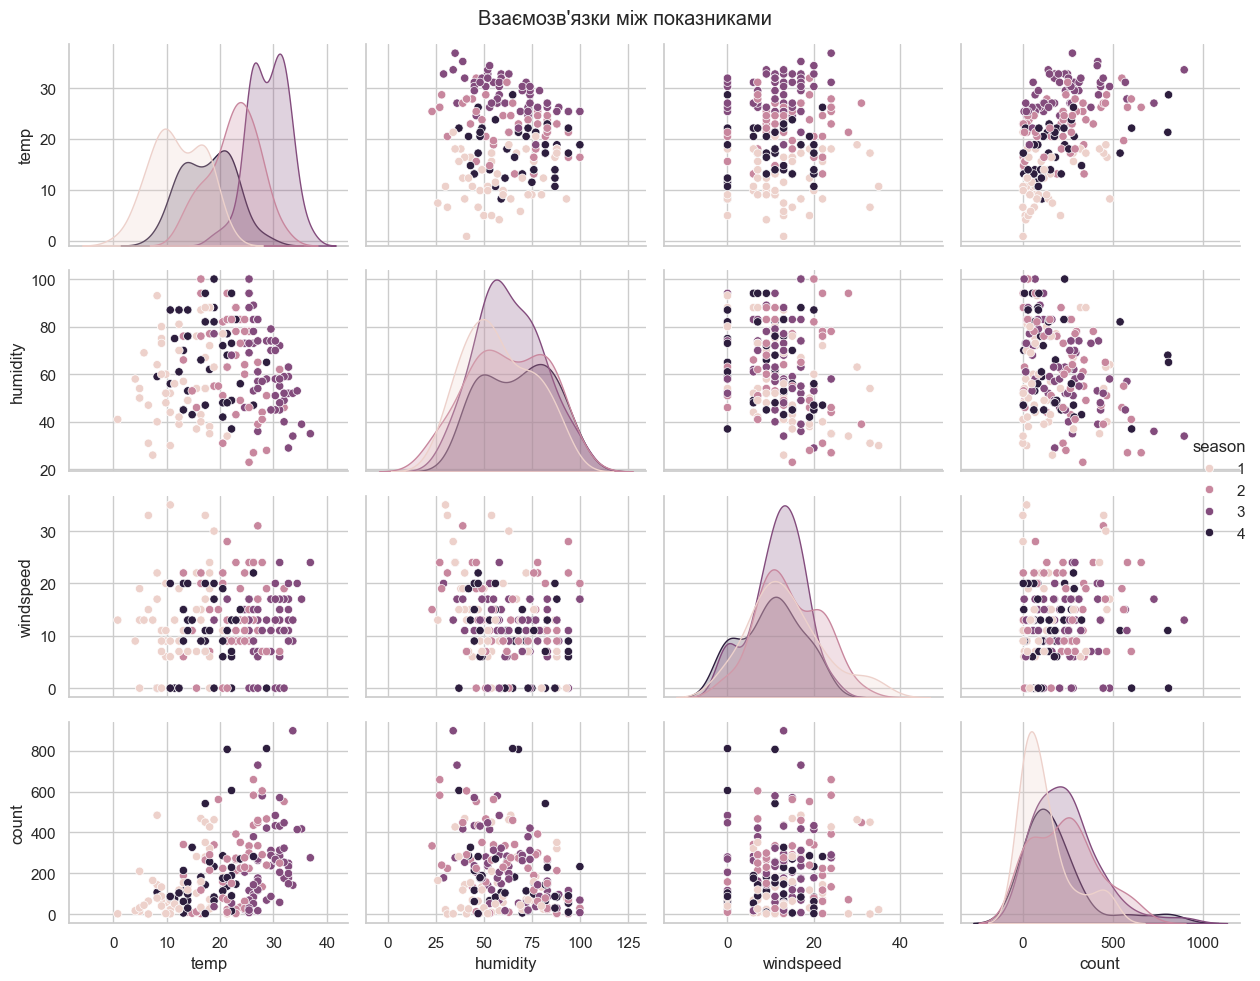

In [94]:
sample_df=df[['temp', 'humidity', 'windspeed', 'count', 'season']].sample(200)
sns.pairplot(sample_df, height=2.5, aspect=1.2, hue='season')
plt.suptitle('Взаємозв\'язки між показниками')
plt.tight_layout()
plt.show()

1. Найсильніший лінійний зв'язок спотерігається між змінними count та temp.
2. Найбільше між кварталами візрізняється змінна temp.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

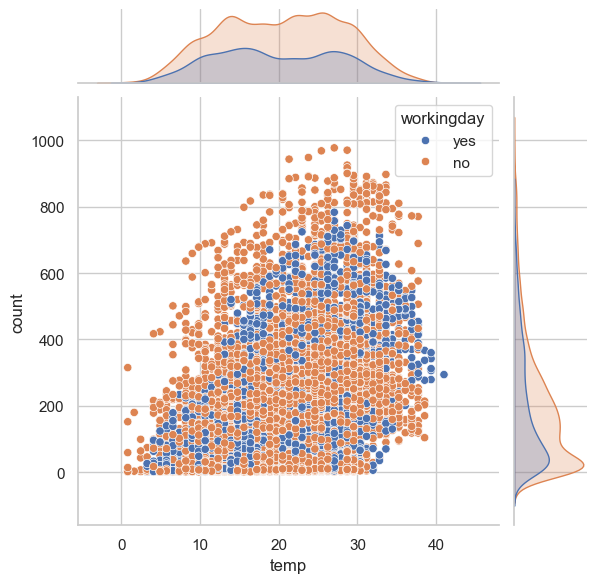

In [6]:
legend_labels = ['yes', 'no']
g = sns.jointplot(df, x='temp', y='count', hue='workingday')
for t, l in zip(g.ax_joint.legend_.texts, legend_labels):
    t.set_text(l)
plt.show()

1. Графіки покраях дозволяють побачити як розподілена кожна змінна окремо.
2. Зграфіку видно, що в робочі дні попит більш стабільний, тому що розкид менший, а ось у вихідні дні розкид ширше і більша залежність від температури.